# Homework 3: Image Convolution and Approximation Homework

# Group Members: Dominik Gausepohl, Florian

**Due**: Wednesday, December 6, 9:14am, via
[Moodle](https://moodle.uni-heidelberg.de/mod/assign/view.php?id=988858)

## Regulations:

We ask you to include your solutions (only the .ipynb) in a zip folder and upload it on Moodle. Include the names of all members (not more than 3) on top of your jupyter notebook as a markdown cell. The submission deadline is always the next week before the beginning of the class on Wednesday at 09:14 but this time you have two weeks to work on this homework. For clarification on the code, please try to include comments in order for it to be understandable.

### Loading required packages packages


In [1]:
from skimage import io, img_as_float, img_as_ubyte
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pickle

### Exact Adder Function

The ExactAdder function performs binary addition on three input bits (a, b, and c). It outputs the sum (s) and carry-out (c_out) based on the combination of input bits. The function encapsulates the logic of a full adder, handling all possible input cases through conditional statements. It is a fundamental component in digital circuit design.


In [2]:
def ExactAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
    return s, c_out

### Approximate Adder Function

The ApproxAdder function attempts binary addition but deviates from conventional logic in its handling of input combinations. In particular, it provides an inaccurate sum (s) for the cases (0, 0, 0) and (1, 1, 1).

Failure Cases:

#### Input (0, 0, 0):

Incorrect sum (s) = 1 Correct carry-out (c_out) = 0

#### Input (1, 1, 1):

Incorrect sum (s) = 0 Correct carry-out (c_out) = 1

#### Considerations:

The function's approach to binary addition may have specific intentions, but users should be cautious about its accuracy, especially in scenarios requiring precise binary addition.

#### Function Usage:

Call the function with three binary inputs (a, b, and c) to obtain the potentially inaccurate sum (s) and correct carry-out (c_out).


In [3]:
def ApproxAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=1
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=0
        c_out=1
    return s, c_out

### N-bit Adder Function

The `MyNbitAdder` function is designed to perform N-bit addition, where the lower 4 bits utilize an approximate adder (`ApproxAdder`), and the remaining bits employ an exact adder (`ExactAdder`).

#### Function Overview

1.  **Input Conversion:**

    -   Convert input integers `a` and `b` to binary and remove the binary prefix.

2.  **Byte Reversal:**

    -   Reverse the order of bits in both binary representations.

3.  **Equalizing Byte Length:**

    -   Ensure both binary representations have equal length by padding with zeros.

4.  **Bitwise Addition:**

    -   Perform bitwise addition, using either the approximate adder or exact adder based on the specified threshold (`approx_until`).

5.  **Result Calculation:**
    -   Calculate the total sum by summing up the bitwise results and accounting for any carry-over.

This function allows users to perform N-bit addition with a customizable threshold (`approx_until`) to switch between the approximate and exact adders. Adjust the threshold as needed for specific requirements.


In [4]:
#In 12 bit adder, lower 4 bits are implemented with approximate adder and rest of the with with exact adder
#Change approx_until to != 0 if u want to approximate the first bits by an approximate adder
def MyNbitAdder(a,b, approx_until = 0):
    #convert to binary and cut off the first two indices (they dont belong to the number but indicate that it is binary)
    a_bin, b_bin = bin(a)[2:] , bin(b)[2:]

    #reverse order of bytes for the adder
    rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])


    #We want to make the to bytes to equalt length such that we can add
    #--> add zeros to the shortest list until it is the same as the longest
    rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [0]
    rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [0]


    carry_over  = 0
    total_sum   = 0


    #we want to do a bitwise addition
    for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):

        if index < approx_until:
            #use approx_adder
            sum_element, carry_over = ApproxAdder(int(bit1), int(bit2), int(carry_over) )
        else:
            #use exact_adder
            sum_element, carry_over = ExactAdder(int(bit1), int(bit2), int(carry_over) )

        total_sum += pow(2,index)*sum_element

    total_sum += pow(2,index+1)*carry_over
    return total_sum

    MyNbitAdder(4,2)

### Image Adder Function

The `MyAdder` function is designed to add two images represented as arrays (`f` and `g`). It utilizes a custom N-bit adder (`MyNbitAdder`) for element-wise addition of corresponding pixel values.

#### Function Overview

1.  **Input Conversion:**

    -   Convert input images `f` and `g` to NumPy arrays and ensure they are of integer type.

2.  **Image Size Validation:**

    -   Ensure that the size of both images is the same.

3.  **Pixel-wise Addition:**

    -   Iterate through each pixel of the images and use the custom N-bit adder (`MyNbitAdder`) to add corresponding pixel values.

4.  **Resultant Image:**
    -   Return the resultant image as a NumPy array.

This function allows users to add two images pixel-wise using the custom N-bit adder. Ensure that the images have the same size for proper element-wise addition. Adjust the input images as needed for specific use cases.


In [5]:
# Function that addes two images
def MyAdder(f,g,approx_until=0):

    f=np.array(f).astype(int)
    g=np.array(g).astype(int)
    #ensure that the size of the image is the same

    res = np.zeros(f.shape)

    for i in range(f.shape[0]):
        for j in range(f.shape[1]):

            #we will use a custom adding function
            res[i, j] = MyNbitAdder(f[i,j],g[i,j],approx_until=approx_until)/2

    return res

f = np.eye(3)
g = np.eye(3)
MyAdder(f,g)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Filter Definition

The kernel or filter for convolution is defined as follows: This 3x3 filter is often used in image processing, particularly in Gaussian blur operations. Each element in the filter contributes to the weighted sum of pixel values during convolution, emphasizing the central pixel. Adjustments to the filter values can impact the characteristics of the convolution operation, such as blurring or edge detection.


In [6]:
########## Gaussian kernel/filter ##############
fltr = [
[1, 2, 1],
[2, 4, 2],
[1, 2, 1]
]
fltr = np.array(fltr)


### Additional Filters

In addition to the Gaussian filter mentioned above, we provide two types of filters classified as follows:

#### 1) Low Pass Filter

-   **f1:** Low pass average filter
-   **f2:** Low pass Gaussian filter with dimension 3x3
-   **f3:** Low pass Gaussian filter with dimension 5x5

These filters are designed for tasks such as removing noise from images or smoothing/blurring images. The key characteristic is that the sum of all the kernel elements should be one.

#### 2) High Pass Filter

-   **f4:** High pass horizontal vertical filter
-   **f5:** High pass diagonal filter
-   **f6:** Sobel horizontal edge filter

High pass filters are utilized for edge detection or sharpening of images, and they have the property that the sum of all the kernel elements should be zero.


In [7]:
f1 = [
[1, 1, 1],
[1, 1, 1],
[1, 1, 1]
]
f1 = 1/9*np.array(f1)

#again a normalized gaussian filter
f2 = [
[1, 2, 1],
[2, 4, 2],
[1, 2, 1]
]
f2 = 1/16*np.array(f2)

f3 = [
[1, 4, 7, 4, 1],
[4, 16, 26, 16, 4],
[7, 26, 41, 26, 7],
[4, 16, 26, 16, 4],
[1, 4, 7, 4, 1]
]
f3 = 1/273*np.array(f3)

f4 = [
[0, -1, 0],
[-1, 4, -1],
[0, -1, 0]
]
f4 = np.array(f4)

f5 = [
[-1, 0, -1],
[0, 4, 0],
[-1, 0, -1]
]
f5 = np.array(f5)

f6 = [
[1, 2, 1],
[0, 0, 0],
[-1, -2, -1]
]
f6 = np.array(f6)


## Homework Objective:

The objective of this homework is to explore the approximation of the "adding process" within the convolution operation. This involves defining functions for multi-adding (`MultiAdder`) and approximating convolution (`MyConvAdder`). The degree of approximation can be controlled by the variable `approx_until`. Additionally, we will compare the results of approximate convolution with an exact convolution using Python's own convolution function.

## Subtasks:

### 1.1 **Define the "MultiAdder" Function (5 points):**

-   Create a function called `MultiAdder` that takes a list/matrix of numbers and uses the `MyAdder` function to add them approximately.
-   The function should return the result of the multi-adding process.


In [8]:
def MultiAdder(numbers,approx_until=0):
    # Initialize the result with the first number
    result = 0
    numbers=np.array(numbers).astype(int)
    # Loop over the rest of the numbers
    for elements in numbers:
        for number in elements:
            # result = MyAdder(np.array(result).astype(int),np.array(number).astype(int),approx_until=approx_until)
            result = MyNbitAdder((result),(number),approx_until=approx_until)
        
    # Return the result of the multi-adding process
    return result

### 1.2 \*_Define the "MyConvAdder" Function (5 points):_

-   Create a function called `MyConvAdder` that simulates the convolution operation using the `MultiAdder` function for the adding process.
-   The function should take an image and a 3x3 filter/kernel and return the convolved image.


In [9]:
def MyConvAdder(image, kernel, approx_until=0):
    # Get the shapes of the image and kernel
    image_shape = image.shape
    kernel_shape = kernel.shape

    # Calculate the shape of the result
    res_shape = (image_shape[0] - kernel_shape[0] + 1, image_shape[1] - kernel_shape[1] + 1)

    # Initialize the result with zeros
    res = np.zeros(res_shape)

    # Perform the convolution operation
    for i in range(res_shape[0]):
        for j in range(res_shape[1]):
            # Extract the current region
            region = image[i:(i+kernel_shape[0]), j:(j+kernel_shape[1])]

            # Multiply the region with the flipped kernel
            multiplied_elements = [a*b for a, b in zip(region, np.flip(kernel))]

            # Use the MultiAdder function to add the multiplied matrices
            res[i, j] = MultiAdder(multiplied_elements, approx_until=approx_until)

    # Return the convolved image
    return res

### 1.3 **Import the Sample Image and use the already defined filter(5 points):**

-   Import the sample image and convert it to grayscale(already discussed in lecture). The sample image(man.jpeg) is also given in the resouces folder on Moodle.
-   Use a 3x3 gaussian filter/kernel (fltr) for convolution and apply the above `MyConvAdder` function on the sample image
-   Additionally, try out some of the given filters above f1-f6 and observe and document the effects on the convolved image


In [11]:
# Your code here
sample_image = io.imread("man.jpeg")
filter_kernel = fltr

sample_image = sample_image
sample_image = (0.299 * np.array(sample_image[:, :, 0])) + (0.587 * np.array(sample_image[:, :, 1])) + (0.114 * np.array(sample_image[:, :, 2])) 
sample_image = np.array(sample_image).astype(int)

In [13]:
convImages = []
positiveKernels = [filter_kernel,f1,f2,f3]
allKernels = [filter_kernel,f1,f2,f3,f4,f5,f6]
kernels = positiveKernels

for kernel in kernels:
    print("starting new iteration\n")
    # try:
    convImages.append([MyConvAdder(sample_image,kernel),kernel])
    # except:
        # pass

starting new iteration

starting new iteration

starting new iteration

starting new iteration



In [14]:
with open('convImages.pkl', 'wb') as file: 
    pickle.dump(convImages, file) 

In [15]:
convImages = []
fileName = "convImages.pkl"
with open(fileName, 'rb') as file: 
    convImages += pickle.load(file) 

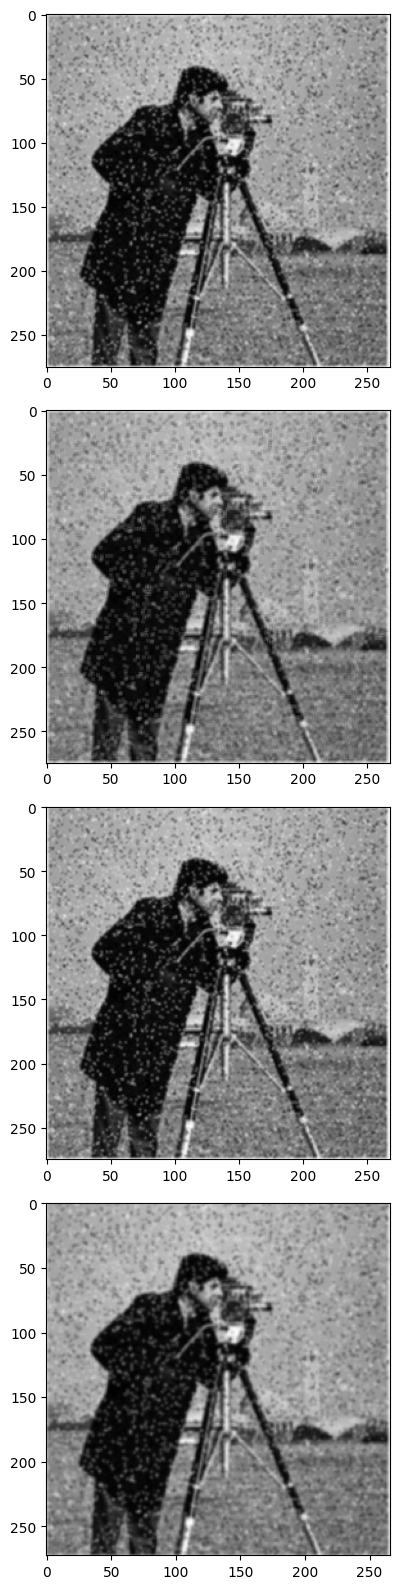

In [16]:
fig, axes = plt.subplots(len(convImages), 1, figsize=(4, 4*len(convImages)))

for i, ax in enumerate(axes.ravel()):
    # ax.imshow(np.average(convImages[i],axis=-1))
    ax.imshow(convImages[i][0], cmap = 'gray')

plt.tight_layout()
plt.show()

### 1.4 **Perform Approximate and Exact Convolution (5 points):**

-   Use the `MyConvAdder` function to perform approximate convolution.
-   Use Python's own convolution function (e.g., from `scipy.signal`) to perform exact convolution.
-   Compare the results and calculate the error and similarity between the two convolution outputs.


error: 0
similarity: 1.0

error: 282503
similarity: 0.9955491681440479

error: 293886
similarity: 0.9953710194393062

error: 824700
similarity: 0.9783913450042284



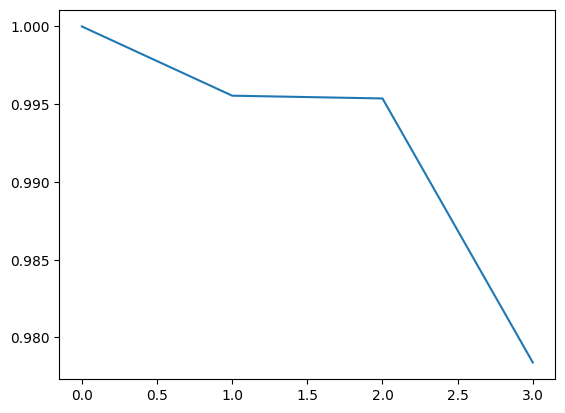

In [22]:
# Your code here
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
error = []
ssi = []
# Compare results and calculate error/similarity
for i in range(len(convImages)):
    approx_convolution_result = convImages[i][0]
    exact_convolution_result = signal.convolve2d(sample_image,  convImages[i][1], mode ="valid", )
    error.append(np.sum(exact_convolution_result - approx_convolution_result))
    print(f"error: {int(error[-1])}")
    
    data_range=exact_convolution_result.max() - approx_convolution_result.max()  
    ssi.append(ssim(exact_convolution_result, approx_convolution_result, data_range=data_range))
    print(f"similarity: {ssi[-1]}\n")

# plt.plot(error)
plt.plot(ssi)
plt.title("similartiy over")
